We are going to prepare the malicious dataset first(We are going to use all 3 logs for injecting the malicious traffics..)

In [1]:
import pandas as pd 

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']
malicious_logs1 = pd.read_csv('Attack1_log.txt', sep='|', header=None, names=columns)
malicious_logs2 = pd.read_csv('Attack2_log.txt', sep='|', header=None, names=columns)
malicious_logs3 = pd.read_csv('Attack3_log.txt', sep='|', header=None, names=columns)

combined_malicious_logs = pd.concat([malicious_logs1, malicious_logs2, malicious_logs3], ignore_index= True)

In [2]:
combined_malicious_logs

,ID,Date,Time,Session_ID,Depth,Path,Label
0,0,15/04/2012,13:46:06 p.m.,40675566,4,0\1\2\3\4,NaN
1,1,15/04/2012,13:46:06 p.m.,40675566,4,0\1\2\3\4,NaN
2,2,15/04/2012,13:46:06 p.m.,40675566,4,0\1\2\3\4,NaN
3,3,15/04/2012,13:46:06 p.m.,40675566,4,0\1\2\3\4,NaN
4,4,15/04/2012,13:46:06 p.m.,40675566,4,0\1\2\3\4,NaN
...,...,...,...,...,...,...,...
21657,14908,10/04/2012,13:21:00 p.m.,40242060,7,0\1\2\3\180\677\695\697,NaN
21658,14909,10/04/2012,13:21:00 p.m.,40242060,8,0\1\2\3\180\677\695\697\698,NaN
21659,14910,10/04/2012,13:21:00 p.m.,40242060,8,0\1\2\3\180\677\695\697\698,NaN
21660,14911,10/04/2012,13:21:00 p.m.,40242060,9,0\1\2\3\180\677\695\697\698\699,NaN


In [3]:
print(len(combined_malicious_logs))


21662


In [4]:
combined_malicious_logs['Time'] = combined_malicious_logs['Time'].str.replace(' a.m.', '', regex=False)
combined_malicious_logs['Time'] = combined_malicious_logs['Time'].str.replace(' p.m.', '', regex=False)

combined_malicious_logs['Timestamp'] = pd.to_datetime(
    combined_malicious_logs['Date'] + ' ' + combined_malicious_logs['Time'], 
    format='%d/%m/%Y %H:%M:%S', 
    errors='coerce' 
)

combined_malicious_logs

,ID,Date,Time,Session_ID,Depth,Path,Label,Timestamp
0,0,15/04/2012,13:46:06,40675566,4,0\1\2\3\4,NaN,2012-04-15 13:46:06
1,1,15/04/2012,13:46:06,40675566,4,0\1\2\3\4,NaN,2012-04-15 13:46:06
2,2,15/04/2012,13:46:06,40675566,4,0\1\2\3\4,NaN,2012-04-15 13:46:06
3,3,15/04/2012,13:46:06,40675566,4,0\1\2\3\4,NaN,2012-04-15 13:46:06
4,4,15/04/2012,13:46:06,40675566,4,0\1\2\3\4,NaN,2012-04-15 13:46:06
...,...,...,...,...,...,...,...,...
21657,14908,10/04/2012,13:21:00,40242060,7,0\1\2\3\180\677\695\697,NaN,2012-04-10 13:21:00
21658,14909,10/04/2012,13:21:00,40242060,8,0\1\2\3\180\677\695\697\698,NaN,2012-04-10 13:21:00
21659,14910,10/04/2012,13:21:00,40242060,8,0\1\2\3\180\677\695\697\698,NaN,2012-04-10 13:21:00
21660,14911,10/04/2012,13:21:00,40242060,9,0\1\2\3\180\677\695\697\698\699,NaN,2012-04-10 13:21:00


In [5]:
combined_malicious_logs.drop(['Date', 'Time'], axis=1, inplace = True)
combined_malicious_logs['Label'] = 1
combined_malicious_logs

,ID,Session_ID,Depth,Path,Label,Timestamp
0,0,40675566,4,0\1\2\3\4,1,2012-04-15 13:46:06
1,1,40675566,4,0\1\2\3\4,1,2012-04-15 13:46:06
2,2,40675566,4,0\1\2\3\4,1,2012-04-15 13:46:06
3,3,40675566,4,0\1\2\3\4,1,2012-04-15 13:46:06
4,4,40675566,4,0\1\2\3\4,1,2012-04-15 13:46:06
...,...,...,...,...,...,...
21657,14908,40242060,7,0\1\2\3\180\677\695\697,1,2012-04-10 13:21:00
21658,14909,40242060,8,0\1\2\3\180\677\695\697\698,1,2012-04-10 13:21:00
21659,14910,40242060,8,0\1\2\3\180\677\695\697\698,1,2012-04-10 13:21:00
21660,14911,40242060,9,0\1\2\3\180\677\695\697\698\699,1,2012-04-10 13:21:00


We have preprocessed it for the injection. Now lets work on the benign dataset

In [6]:
benign_dataset = pd.read_csv("user1_log.txt", sep = '|', header = None, names = columns)
benign_dataset['Time'] = benign_dataset['Time'].str.replace(' a.m.', '', regex=False)
benign_dataset['Time'] = benign_dataset['Time'].str.replace(' p.m.', '', regex=False)
benign_dataset['Timestamp'] = pd.to_datetime(
    benign_dataset['Date'] + ' ' + benign_dataset['Time'], 
    format='%d/%m/%Y %H:%M:%S', 
    errors='coerce' 
)
benign_dataset.drop(['Date', 'Time'], axis = 1, inplace=True)
benign_dataset['Label'] = 0 
benign_dataset

,ID,Session_ID,Depth,Path,Label,Timestamp
0,0,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
1,1,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
2,2,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
3,3,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
4,4,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
...,...,...,...,...,...,...
274047,274047,40617974,3,0\1\2\3,0,2012-04-14 21:46:14
274048,274048,40617974,3,0\1\2\3,0,2012-04-14 21:46:14
274049,274049,40617974,4,0\1\2\3\7632,0,2012-04-14 21:46:14
274050,274050,40617974,4,0\1\2\3\157,0,2012-04-14 21:46:14


In [7]:
import random as rd

example_df = combined_malicious_logs.sample(frac = 0.4, random_state= 42) # Sampling random 30% from the dataset..

print(len(example_df))
example_df.head()

8665


,ID,Session_ID,Depth,Path,Label,Timestamp
16564,9815,40241963,5,0\1\2\3\7\887,1,2012-04-10 13:19:23
4667,2300,40241115,10,0\1\2\3\7\887\888\889\890\905\896,1,2012-04-10 13:05:15
21267,14518,40242052,5,0\1\2\3\14\63,1,2012-04-10 13:20:52
21039,14290,40242046,10,0\1\2\3\7\887\888\889\890\893\891,1,2012-04-10 13:20:46
11674,4925,40241866,6,0\1\2\3\7\887\932,1,2012-04-10 13:17:46


In [8]:
example_injected_dataset = pd.concat([benign_dataset, example_df], ignore_index= True)
example_injected_dataset

,ID,Session_ID,Depth,Path,Label,Timestamp
0,0,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
1,1,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
2,2,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
3,3,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
4,4,35396524,4,0\1\2\3\4,0,2012-02-14 10:22:04
...,...,...,...,...,...,...
282712,7156,40241912,4,0\1\2\3\7,1,2012-04-10 13:18:32
282713,3598,40241173,6,0\1\2\3\14\29\2709,1,2012-04-10 13:06:13
282714,1505,40241802,6,0\1\2\3\180\572\635,1,2012-04-10 13:16:42
282715,5083,40241870,5,0\1\2\3\14\51,1,2012-04-10 13:17:50


Now Lets We have sucessfully injected the dataset, we are going to preprocess it in similar way of the darpa

In [9]:
current_time = 0 
prev_timestamp = None 
time_mapping = []

example_injected_dataset = example_injected_dataset.sort_values(by = 'Timestamp').reset_index(drop= True)

for timestamp in example_injected_dataset['Timestamp']:
    if timestamp != prev_timestamp:  
        current_time += 1
        prev_timestamp = timestamp
    time_mapping.append(current_time)

example_injected_dataset['Sequential_Time'] = time_mapping  

edges = []
for _, row in example_injected_dataset.iterrows():
    path_nodes = row['Path'].split('\\')  
    for i in range(len(path_nodes) - 1):
        edges.append({
            'src_ip': path_nodes[i],           # Source node
            'dest_ip': path_nodes[i + 1],      # Destination node
            'time': row['Sequential_Time'],    # Sequential time
            'label': row['Label']            # Label
        })

example_injected_dataset_df = pd.DataFrame(edges)

example_injected_dataset_df.to_csv('sequential_time_wuil_dataset2.csv')

print(example_injected_dataset_df.head())   

  src_ip dest_ip  time  label
0      0       1     1      0
1      1       2     1      0
2      2       3     1      0
3      3       4     1      0
4      0       1     1      0


In [10]:

example_injected_dataset = example_injected_dataset.sort_values(by = 'Timestamp').reset_index(drop= True)
example_injected_dataset['Hashed_Time'] = example_injected_dataset['Timestamp'].apply(lambda x: abs(hash(x)) if pd.notnull(x) else None)

edges = []
for _, row in example_injected_dataset.iterrows():
    path_nodes = row['Path'].split('\\')  
    for i in range(len(path_nodes) - 1):
        edges.append({
            'src_ip': path_nodes[i],           # Source node
            'dest_ip': path_nodes[i + 1],      # Destination node
            'time': row['Hashed_Time'],    # Sequential time
            'label': row['Label']            # Label
        })

example_injected_dataset_df = pd.DataFrame(edges)

example_injected_dataset_df.to_csv('sequential_time_wuil_dataset3.csv')

print(example_injected_dataset_df.head())

  src_ip dest_ip                 time  label
0      0       1  3207069411013726940      0
1      1       2  3207069411013726940      0
2      2       3  3207069411013726940      0
3      3       4  3207069411013726940      0
4      0       1  3207069411013726940      0


In [11]:
print(len(example_injected_dataset_df))

1468395


Visualize the dataset

C:\Users\seoji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


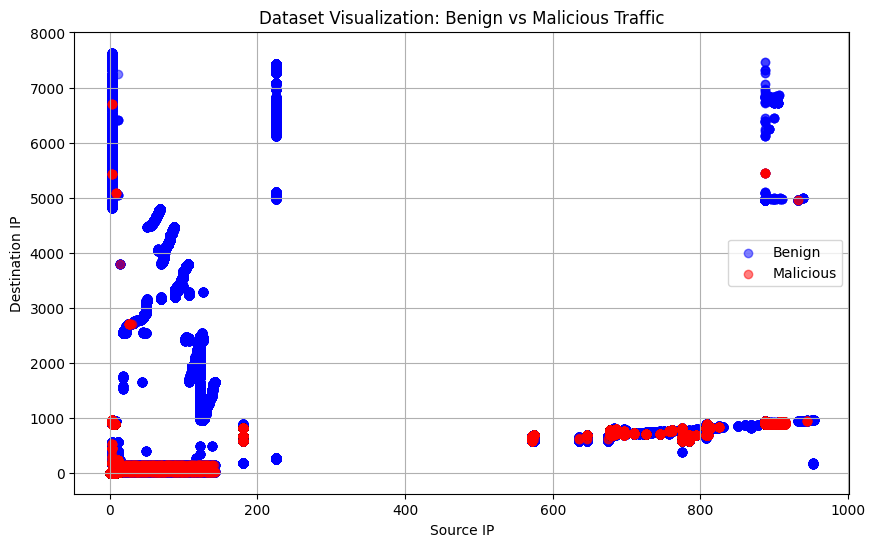

In [ ]:
import matplotlib.pyplot as plt 

df = pd.read_csv('sequential_time_wuil_dataset2.csv')

plt.figure(figsize = (10,6))

benign = df[df['label'] == 0]
plt.scatter(benign['src_ip'], benign['dest_ip'], c='blue', label='Benign', alpha=0.5)

malicious = df[df['label'] == 1]

plt.scatter(malicious['src_ip'], malicious['dest_ip'], c='red', label='Malicious', alpha=0.5)

plt.xlabel('Source IP')
plt.ylabel('Destination IP')
plt.title('Dataset Visualization: Benign vs Malicious Traffic')
plt.legend()
plt.grid(True)
plt.show()